In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline

# Load CSV file
input_csv = "/content/drive/MyDrive/IPB/ipb_news.csv"
df = pd.read_csv(input_csv)
df.head()


,Title,Content,Date,URL
0,Guru Besar IPB: Indonesia Berpotensi Swasembad...,"JAKARTA, KOMPAS.com - Guru Besar Universitas I...",2025-01-21,http://money.kompas.com/read/2025/01/21/170544...
1,"Biaya Kuliah Kedokteran di UI, Unpad dan IPB J...",KOMPAS.com - Pendaftaran SNBP 2025 (Seleksi Na...,2025-02-04,http://www.kompas.com/edu/read/2025/02/04/1455...
2,Rektor IPB: Masih Ada Kesenjangan Pembiayaan S...,"JAKARTA, KOMPAS.com - Rektor Institut Pertania...",2025-01-18,http://lestari.kompas.com/read/2025/01/18/1632...
3,Daftar PTN yang Buka Pendaftaran Mahasiswa Bar...,KOMPAS.com - Pengalaman organisasi siswa saat ...,2025-01-23,http://www.kompas.com/kalimantan-timur/read/20...
4,Prospek Kerja Jurusan Proteksi Tanaman dan Pil...,KOMPAS.com - Salah satu jurusan kuliah yang bi...,2025-02-13,http://www.kompas.com/edu/read/2025/02/13/1506...


In [ ]:
from transformers import pipeline, AutoTokenizer
import numpy as np


model_name = "tabularisai/multilingual-sentiment-analysis"
sentiment_pipeline = pipeline("sentiment-analysis", model=model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


def split_text(text, max_tokens=512):
    tokens = tokenizer.encode(text, add_special_tokens=False)
    chunks = [tokens[i : i + max_tokens] for i in range(0, len(tokens), max_tokens)]

    return [tokenizer.decode(chunk, skip_special_tokens=True) for chunk in chunks]


sentiment_mapping = {
    "Very Negative": 1,
    "Negative": 2,
    "Neutral": 3,
    "Positive": 4,
    "Very Positive": 5
}


def analyze_full_text_sentiment(text):
    chunks = split_text(text)
    sentiments = [sentiment_pipeline(chunk[:512])[0]['label'] for chunk in chunks]

    sentiment_scores = [sentiment_mapping.get(sent, 3) for sent in sentiments]
    avg_sentiment = round(np.mean(sentiment_scores))

    final_sentiment = next(key for key, value in sentiment_mapping.items() if value == avg_sentiment)

    return final_sentiment

df["text"] = df["Title"].astype(str) + " " + df["Content"].astype(str)
df["sentiment"] = df["text"].apply(analyze_full_text_sentiment)

print(df[["Title", "sentiment"]].head())


Device set to use cuda:0
Token indices sequence length is longer than the specified maximum sequence length for this model (604 > 512). Running this sequence through the model will result in indexing errors


                                               Title      sentiment
0  Guru Besar IPB: Indonesia Berpotensi Swasembad...        Neutral
1  Biaya Kuliah Kedokteran di UI, Unpad dan IPB J...  Very Positive
2  Rektor IPB: Masih Ada Kesenjangan Pembiayaan S...       Positive
3  Daftar PTN yang Buka Pendaftaran Mahasiswa Bar...       Positive
4  Prospek Kerja Jurusan Proteksi Tanaman dan Pil...        Neutral


In [ ]:
output_csv = "news_with_sentiment.csv"
df.to_csv(output_csv, index=False)
print(f"Sentiment analysis completed. Results saved to {output_csv}")

Sentiment analysis completed. Results saved to news_with_sentiment.csv


In [37]:
sample = df.sample(1).iloc[0]
print(f"Text: {sample['text']}\nSentiment: {sample['sentiment']}")

Text: IPB Buka Prodi Baru S1 Kecerdasan Buatan, Pendaftaran Dibuka Hari Ini KOMPAS.com - Institut Pertanian Bogor atau IPB University membuka Program Studi (Prodi) S1 Kecerdasan Buatan. Pendaftaran Prodi S1 Kecerdasan Buatan dimulai tanggal 26 hingga 28 Juli 2024 melalui Seleksi Mandiri Masuk IPB (SM IPB) atau Jalur Mandiri. Siswa bisa mendaftarkan diri melalui laman admisi.ipb.ac.id. Dr Yeni Herdiyeni, Ketua Prodi S1 Kecerdasan Buatan IPB University menyampaikan bahwa prodi ini telah ditetapkan di bawah naungan Sekolah Sains Data, Matematika dan Informatika IPB University. "Prodi Kecerdasan Buatan ini didirikan untuk membentuk lulusan yang memiliki kemampuan dalam bidang kecerdasan buatan atau artificial intelligence (AI) untuk menyelesaikan masalah yang berhubungan dengan penerapan teknologi sistem cerdas (intelligent system)," jelasnya, dilansir dari laman IPB. Baca juga: Biaya Kuliah IPB University Jalur Mandiri 2024, Cek UKT dan BPIF Dengan kompetensi tersebut, sebut Dr Yeni, para

sentiment  Negative  Neutral  Positive  Very Negative  Very Positive
year                                                                
2013            2.0      2.0       2.0            1.0            3.0
2014            0.0      1.0       1.0            1.0            0.0
2015            2.0      6.0       4.0            8.0            2.0
2016            2.0      0.0       6.0            3.0            0.0
2017            0.0      5.0       4.0            1.0            2.0
2018           10.0      6.0       4.0            8.0            4.0
2019           18.0     15.0      17.0            8.0           17.0
2020           19.0     21.0      55.0            8.0           20.0
2021           29.0     59.0     127.0           18.0           33.0
2022           51.0     37.0      95.0           19.0           28.0
2023           22.0     24.0      52.0            9.0           20.0
2024            8.0     24.0      39.0            3.0           15.0
2025            8.0      7.0      

<Figure size 1200x600 with 0 Axes>

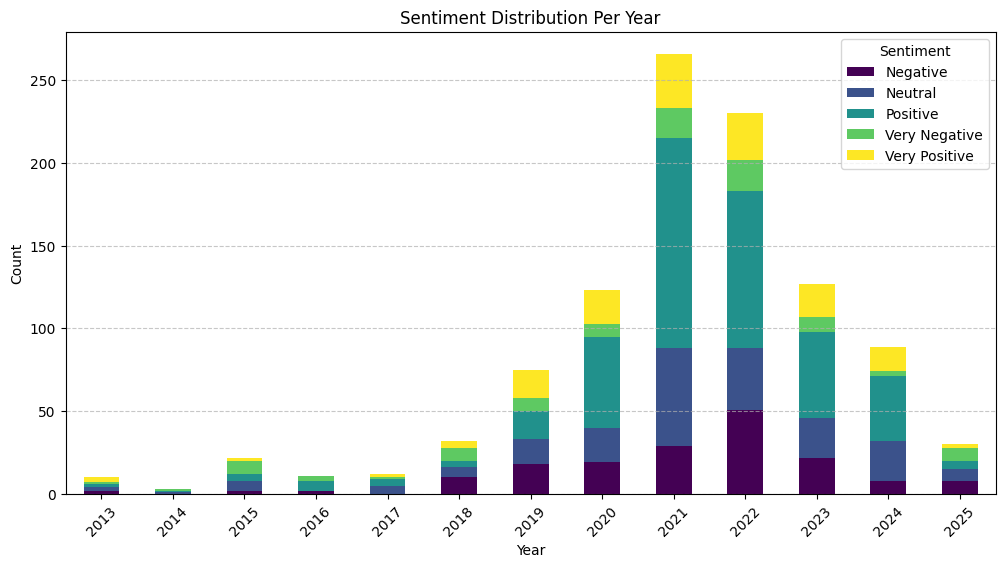

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' column to datetime and handle invalid values
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])  # Remove invalid dates

# Extract year
df['year'] = df['Date'].dt.year

# Aggregate sentiment per year
sentiment_per_year = df.groupby(['year', 'sentiment']).size().unstack().fillna(0)

print(sentiment_per_year)

# Plot
plt.figure(figsize=(12, 6))
sentiment_per_year.plot(kind='bar', stacked=True, colormap="viridis", figsize=(12, 6))

plt.title("Sentiment Distribution Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()